## Exploring the weather in Athens

---

> <h4>Konstantina Saketou</h4><br />
> Assignment in Applied Machine Learning <br />
> Management Science and Technology Department <br />
> Athens University of Economics and Business

### Q1: Obtain and edit the data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data_file = "weatherdata_hellinikon.csv"
supplementary_data_file = "weatherdata_athens.csv"

* First of all we import the data from the csv files and also all the necessary libraries. 
* We save the data of the Hellinikon station at the DataFrame `data_hellinikon`. We also save the supplementary data of Athens' weather at the `data_supl` DataFrame.
* The supplementary data don't have column names so we add our own. The columns C1-C9 contain data which we will not use, so we delete them from the dataframe.

In [2]:
data_hellinikon = pd.read_csv(data_file, parse_dates=['DATE'], skipinitialspace = True)
data_supl = pd.read_csv(supplementary_data_file, parse_dates=[0], 
                        names=['DATE', 'TEMP_AVG', 'TMAX', 'TMIN', 'C1', 'C2', 'C3', 'C4', 'C5', 
                               'C6', 'RAIN', 'C7', 'C8', 'C9'], skipinitialspace = True)
data_supl.drop(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'], inplace=True, axis=1)

* The data of the Hellinikon station are in Farhenheit (F) so we convert them into Celcius (C).

In [3]:
data_hellinikon['TAVG_CELCIUS'] = (data_hellinikon['TAVG'] - 32)*(5/9)
data_hellinikon

,STATION,NAME,DATE,PRCP,TAVG,TAVG_CELCIUS
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.00,NaN,NaN
1,GR000016716,"HELLINIKON, GR",1955-01-02,0.08,NaN,NaN
2,GR000016716,"HELLINIKON, GR",1955-01-03,0.00,NaN,NaN
3,GR000016716,"HELLINIKON, GR",1955-01-04,0.00,NaN,NaN
4,GR000016716,"HELLINIKON, GR",1955-01-05,0.00,NaN,NaN
...,...,...,...,...,...,...
23246,GR000016716,"HELLINIKON, GR",2020-12-27,0.00,62.0,16.666667
23247,GR000016716,"HELLINIKON, GR",2020-12-28,0.26,59.0,15.000000
23248,GR000016716,"HELLINIKON, GR",2020-12-29,0.00,61.0,16.111111
23249,GR000016716,"HELLINIKON, GR",2020-12-30,0.00,62.0,16.666667


* We delete the Farhenheit column and rename the columns.

In [4]:
del data_hellinikon['TAVG']
data_hellinikon.columns = ['STATION', 'NAME', 'DATE', 'PRCP', 'TAVG']

* Now we convert the precipitation from inches to milimeters.

In [5]:
data_hellinikon['PRCP'] = data_hellinikon['PRCP'] * 25.4
data_hellinikon

,STATION,NAME,DATE,PRCP,TAVG
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.000,NaN
1,GR000016716,"HELLINIKON, GR",1955-01-02,2.032,NaN
2,GR000016716,"HELLINIKON, GR",1955-01-03,0.000,NaN
3,GR000016716,"HELLINIKON, GR",1955-01-04,0.000,NaN
4,GR000016716,"HELLINIKON, GR",1955-01-05,0.000,NaN
...,...,...,...,...,...
23246,GR000016716,"HELLINIKON, GR",2020-12-27,0.000,16.666667
23247,GR000016716,"HELLINIKON, GR",2020-12-28,6.604,15.000000
23248,GR000016716,"HELLINIKON, GR",2020-12-29,0.000,16.111111
23249,GR000016716,"HELLINIKON, GR",2020-12-30,0.000,16.666667


* In order to fill the null values of the `data_hellinikon`, we wil firstly merge this dataframe with the supplemenetary data (`data_supl`). We perform an outer merge using as key the column `DATE`. Then, we sort the data by `DATE`.
* Then, we fill the `null` values of the `TAVG` column, which contains the data of our main dataframe, with the column `TEMP_AVG`, which contains the supplementary data.
* Finally, we delete the columns that we don't need.

In [6]:
data_hellinikon = data_hellinikon.merge(data_supl, on=['DATE'], how='outer')
data_hellinikon = data_hellinikon.sort_values(by='DATE')

data_hellinikon['TAVG'] = data_hellinikon['TAVG'].fillna(data_hellinikon['TEMP_AVG'])
data_hellinikon['PRCP'] = data_hellinikon['PRCP'].fillna(data_hellinikon['RAIN'])

data_hellinikon.drop(['TEMP_AVG', 'TMAX', 'TMIN', 'RAIN'], inplace=True, axis=1)

data_hellinikon

,STATION,NAME,DATE,PRCP,TAVG
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.000,NaN
1,GR000016716,"HELLINIKON, GR",1955-01-02,2.032,NaN
2,GR000016716,"HELLINIKON, GR",1955-01-03,0.000,NaN
3,GR000016716,"HELLINIKON, GR",1955-01-04,0.000,NaN
4,GR000016716,"HELLINIKON, GR",1955-01-05,0.000,NaN
...,...,...,...,...,...
23246,GR000016716,"HELLINIKON, GR",2020-12-27,0.000,16.666667
23247,GR000016716,"HELLINIKON, GR",2020-12-28,6.604,15.0
23248,GR000016716,"HELLINIKON, GR",2020-12-29,0.000,16.111111
23249,GR000016716,"HELLINIKON, GR",2020-12-30,0.000,16.666667


* We convert all the values to numeric in order to be able to perform calculations.

In [7]:
data_hellinikon['PRCP'] = pd.to_numeric(data_hellinikon.PRCP, errors='coerce')
data_hellinikon['TAVG'] = pd.to_numeric(data_hellinikon.TAVG, errors='coerce')

In [8]:
data_hellinikon

,STATION,NAME,DATE,PRCP,TAVG
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.000,NaN
1,GR000016716,"HELLINIKON, GR",1955-01-02,2.032,NaN
2,GR000016716,"HELLINIKON, GR",1955-01-03,0.000,NaN
3,GR000016716,"HELLINIKON, GR",1955-01-04,0.000,NaN
4,GR000016716,"HELLINIKON, GR",1955-01-05,0.000,NaN
...,...,...,...,...,...
23246,GR000016716,"HELLINIKON, GR",2020-12-27,0.000,16.666667
23247,GR000016716,"HELLINIKON, GR",2020-12-28,6.604,15.000000
23248,GR000016716,"HELLINIKON, GR",2020-12-29,0.000,16.111111
23249,GR000016716,"HELLINIKON, GR",2020-12-30,0.000,16.666667


* Now our data is ready for analysis.

### Q2: Deviation of Summer Temperatures

* Firstly, we gather the data of the baseline period from 1974 to 1999 and calculate the mean temperature of all the observations (`base_mean`).

In [9]:
baseline = data_hellinikon[((data_hellinikon.DATE.dt.year <= 1999) & (data_hellinikon.DATE.dt.year >= 1974) &
                         ((data_hellinikon.DATE.dt.month == 6) | (data_hellinikon.DATE.dt.month == 7) |
                          (data_hellinikon.DATE.dt.month == 8)))].copy()
base_mean = baseline.TAVG.mean()
base_mean

26.22776380739502

* In the `summertemps` DataFrame, we save all the data for the summers of all years (1955-2020).

In [10]:
summertemps = data_hellinikon[((data_hellinikon.DATE.dt.month == 6) | (data_hellinikon.DATE.dt.month == 7) |
                          (data_hellinikon.DATE.dt.month == 8))].copy()

* In the DataFrame, we will add one column called `DIFF` which contains the deviation of every record from the mean temperature we calculated above.
* The column `TAVG` contains the average temperature of each observation.

In [11]:
summertemps['DIFF'] = summertemps['TAVG'] - base_mean
summertemps

,STATION,NAME,DATE,PRCP,TAVG,DIFF
151,GR000016716,"HELLINIKON, GR",1955-06-01,0.0,NaN,NaN
152,GR000016716,"HELLINIKON, GR",1955-06-02,0.0,NaN,NaN
153,GR000016716,"HELLINIKON, GR",1955-06-03,0.0,NaN,NaN
154,GR000016716,"HELLINIKON, GR",1955-06-04,0.0,NaN,NaN
155,GR000016716,"HELLINIKON, GR",1955-06-05,0.0,NaN,NaN
...,...,...,...,...,...,...
23124,GR000016716,"HELLINIKON, GR",2020-08-27,0.0,28.333333,2.105570
23125,GR000016716,"HELLINIKON, GR",2020-08-28,0.0,29.444444,3.216681
23126,GR000016716,"HELLINIKON, GR",2020-08-29,0.0,29.444444,3.216681
23127,GR000016716,"HELLINIKON, GR",2020-08-30,0.0,27.777778,1.550014


* We add a new column called `YEAR`, which contains the year of each observation.
* At the `yearlytemps` DataFrame, we keep the daily mean precipitation and deviation from the baseline mean for every year.
* Also, we add a new column called `ROLL`, containing the 10 year rolling average of all years (1955-2020).

In [12]:
summertemps['YEAR'] = summertemps.DATE.dt.year
yearlytemps = summertemps.groupby(['YEAR']).mean()
yearlytemps['ROLL'] = yearlytemps.DIFF.rolling(10, min_periods=1).mean()
yearlytemps

,PRCP,TAVG,DIFF,ROLL
YEAR,,,,
1955,0.207065,NaN,NaN,NaN
1956,0.030370,NaN,NaN,NaN
1957,0.044174,28.100358,1.872595,1.872595
1958,0.033130,27.041063,0.813299,1.342947
1959,0.204304,NaN,NaN,1.342947
...,...,...,...,...
2016,0.077304,28.176329,1.948565,1.952244
2017,0.470761,28.079348,1.851584,1.937224
2018,0.668130,27.409420,1.181656,1.861137


**Graph**
* We will use matplotlib to design the graph.   
* First, we design the mean deviation of each summer's temperature from the baseline and then the 10year rolling average line.

Text(0, 0.5, 'Temperature Deviation, C')

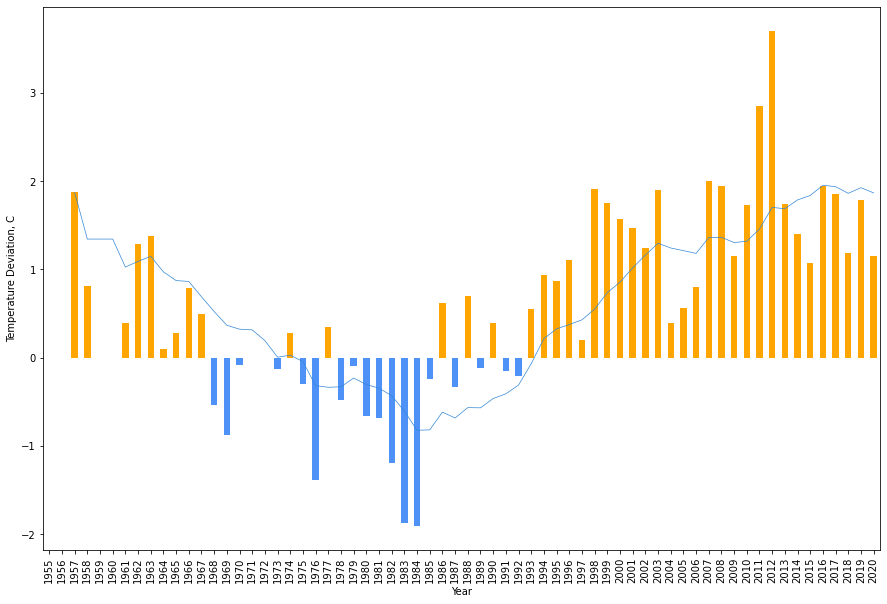

In [13]:
plt.figure(figsize =[15,10])
x = yearlytemps.index
y = yearlytemps['DIFF']
colors = ['orange' if (x>0) else '#4E92F7' for x in y]
p= yearlytemps.DIFF.plot(kind='bar', color=colors)
p.plot(p.get_xticks(),yearlytemps.ROLL, color='#3387D6', lw=0.7)
p.set_xlabel('Year')
p.set_ylabel('Temperature Deviation, C')

#### **Comments**
In the above diagram, the maximum deviation from the baseline mean is a bit larger than 3 degrees, approaching 4.  
In general, most years the tempreture was over the baseline. However, the period from 1967 to 1992 the majority of the temperatures was below the baseline.

### Q3: Evolution of Daily Temperatures

* We begin by creating a copy of `data_hellinikon`, in order to edit the data without altering the original ones.

In [14]:
datatemps = data_hellinikon.copy()

* In the new DataFrame, we add a new column called `YEAR` containing the year of every observation and a column `DAY` with the index of the corresponding day of the year.
* We add another column called `SMOOTHED` with the 30 day rolling average of the temperature for the period from 1955 to 2020.

In [15]:
datatemps['YEAR'] = datatemps.DATE.dt.year
datatemps['DAY'] = datatemps.DATE.dt.dayofyear
datatemps['SMOOTHED'] = datatemps['TAVG'].rolling(window=30, min_periods=1).mean()
datatemps

,STATION,NAME,DATE,PRCP,TAVG,YEAR,DAY,SMOOTHED
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.000,NaN,1955,1,NaN
1,GR000016716,"HELLINIKON, GR",1955-01-02,2.032,NaN,1955,2,NaN
2,GR000016716,"HELLINIKON, GR",1955-01-03,0.000,NaN,1955,3,NaN
3,GR000016716,"HELLINIKON, GR",1955-01-04,0.000,NaN,1955,4,NaN
4,GR000016716,"HELLINIKON, GR",1955-01-05,0.000,NaN,1955,5,NaN
...,...,...,...,...,...,...,...,...
23246,GR000016716,"HELLINIKON, GR",2020-12-27,0.000,16.666667,2020,362,14.092593
23247,GR000016716,"HELLINIKON, GR",2020-12-28,6.604,15.000000,2020,363,14.166667
23248,GR000016716,"HELLINIKON, GR",2020-12-29,0.000,16.111111,2020,364,14.166667
23249,GR000016716,"HELLINIKON, GR",2020-12-30,0.000,16.666667,2020,365,14.222222


* We collect a copy of the data from `data_hellinikon` in order to form the baseline (1974 to 1999 period).
* We add a column called `DAY` with the index of the corresponding day of the year.
* We repeat the process of creating the column `SMOOTHED` like we did above at `datatemps` DataFrame. Then, we calculate the 30 day rolling average.

In [16]:
baseline = data_hellinikon[((data_hellinikon.DATE.dt.year >= 1974) & (data_hellinikon.DATE.dt.year <= 1999))].copy()
baseline['DAY'] = baseline.DATE.dt.dayofyear
baseline['SMOOTHED']= baseline['TAVG'].rolling(window=30, min_periods=1).mean()
baseline

,STATION,NAME,DATE,PRCP,TAVG,DAY,SMOOTHED
6940,GR000016716,"HELLINIKON, GR",1974-01-01,0.000,11.666667,1,11.666667
6941,GR000016716,"HELLINIKON, GR",1974-01-02,0.000,13.888889,2,12.777778
6942,GR000016716,"HELLINIKON, GR",1974-01-03,9.906,12.222222,3,12.592593
6943,GR000016716,"HELLINIKON, GR",1974-01-04,0.000,10.555556,4,12.083333
6944,GR000016716,"HELLINIKON, GR",1974-01-05,0.000,9.444444,5,11.555556
...,...,...,...,...,...,...,...
16431,GR000016716,"HELLINIKON, GR",1999-12-27,0.000,15.555556,361,13.314815
16432,GR000016716,"HELLINIKON, GR",1999-12-28,0.000,16.666667,362,13.537037
16433,GR000016716,"HELLINIKON, GR",1999-12-29,0.000,15.000000,363,13.666667
16434,GR000016716,"HELLINIKON, GR",1999-12-30,0.000,13.333333,364,13.740741


**Graph**
* We use seaborn to create the diagram.
* First we design the average daily temperature of each year (1955-1999) in a relplot form.
* Then, we add a thicker black line with the values of the baseline (1974-1999).

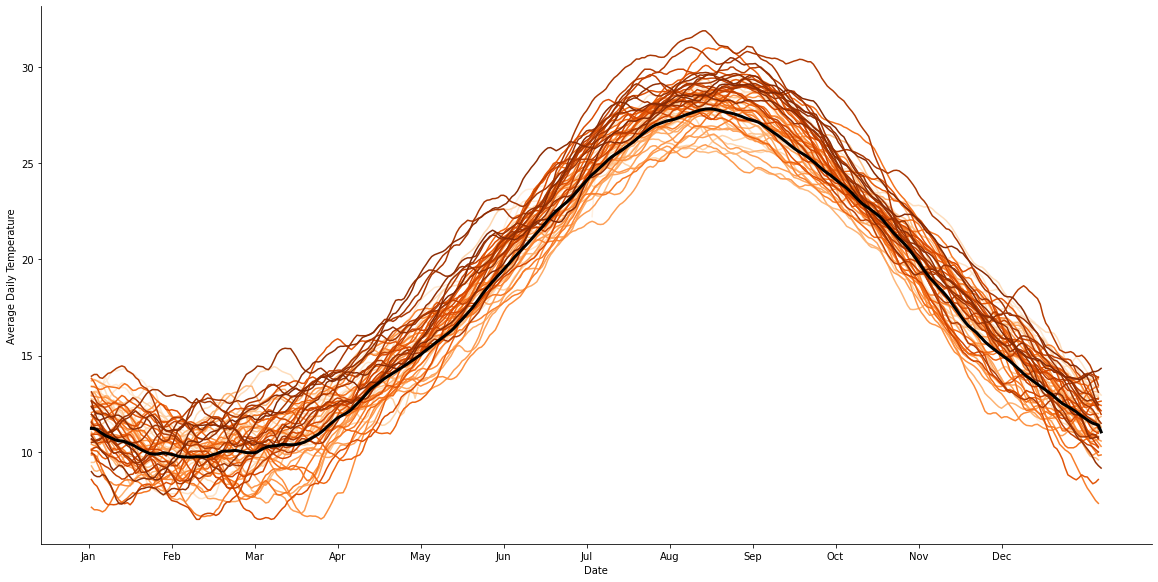

In [17]:
gr = sns.relplot(
    data=datatemps,
    x="DAY", y="SMOOTHED", height = 8, aspect = 2, hue='YEAR',
    kind="line", ci=None, palette = sns.color_palette('Oranges', n_colors=66),
     legend = False, linewidth=1.5
)
gr.set(xlabel ='Date', ylabel = 'Average Daily Temperature', xticks = [i for i in range(0,336,30)],
      xticklabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes=gr.axes.flatten()
for ax in axes:
    sns.lineplot(data=baseline, x='DAY', y='SMOOTHED', ax=ax, color='black', linewidth=3, ci=None)

#### **Comments**
At the above diagram, we generally notice that the mean temperature changes in a similar way during the years 1955 to 2020.  
The mean lowest temperatures are around 10 degrees Celcius and the highest ones are a bit over 30 degrees.

### Q4: Extreme Temperature Events

* First of all, we gather the data of the baseline period 1974-1999.
* Then, we add a column `DAY` which contains the index of the current day of the year.

In [18]:
baseline = data_hellinikon[((data_hellinikon.DATE.dt.year >= 1974) & (data_hellinikon.DATE.dt.year <= 1999))].copy()
del baseline['PRCP']
baseline['DAY'] = baseline.DATE.dt.dayofyear
baseline

,STATION,NAME,DATE,TAVG,DAY
6940,GR000016716,"HELLINIKON, GR",1974-01-01,11.666667,1
6941,GR000016716,"HELLINIKON, GR",1974-01-02,13.888889,2
6942,GR000016716,"HELLINIKON, GR",1974-01-03,12.222222,3
6943,GR000016716,"HELLINIKON, GR",1974-01-04,10.555556,4
6944,GR000016716,"HELLINIKON, GR",1974-01-05,9.444444,5
...,...,...,...,...,...
16431,GR000016716,"HELLINIKON, GR",1999-12-27,15.555556,361
16432,GR000016716,"HELLINIKON, GR",1999-12-28,16.666667,362
16433,GR000016716,"HELLINIKON, GR",1999-12-29,15.000000,363
16434,GR000016716,"HELLINIKON, GR",1999-12-30,13.333333,364


* We group the baseline data by `DAY` and also calculating the mean. That way we will get the mean temperature of each day of the year. 
* Then, we add a column `LIMIT` with the degrees 10% over the mean daily temperature.
* We reset the dataframe's index, which is the `DAY` index, so that we can access it later on the analysis.

In [19]:
grouped_baseline = baseline.groupby('DAY').mean()
grouped_baseline['LIMIT'] = grouped_baseline.TAVG * 1.1
grouped_baseline = grouped_baseline.reset_index()
grouped_baseline

,DAY,TAVG,LIMIT
0,1,10.363248,11.399573
1,2,10.705128,11.775641
2,3,10.213675,11.235043
3,4,9.594017,10.553419
4,5,9.957265,10.952991
...,...,...,...
361,362,10.277778,11.305556
362,363,10.662393,11.728632
363,364,11.025641,12.128205
364,365,11.111111,12.222222


* Now, we merge the baseline data with the grouped data by day, using the column `DAY` as key.
* That way, we can easily compare the limit temperature of each day (column `LIMIT`) with the daily temperature of the baseline (column `TAVG_x`).
* We finally delete the columns we won't need.

In [20]:
merged =baseline.merge(grouped_baseline, on='DAY', how='outer')
merged.drop(['TAVG_y'], inplace=True, axis=1)
merged

,STATION,NAME,DATE,TAVG_x,DAY,LIMIT
0,GR000016716,"HELLINIKON, GR",1974-01-01,11.666667,1,11.399573
1,GR000016716,"HELLINIKON, GR",1975-01-01,8.888889,1,11.399573
2,GR000016716,"HELLINIKON, GR",1976-01-01,11.111111,1,11.399573
3,GR000016716,"HELLINIKON, GR",1977-01-01,10.000000,1,11.399573
4,GR000016716,"HELLINIKON, GR",1978-01-01,7.222222,1,11.399573
...,...,...,...,...,...,...
9491,GR000016716,"HELLINIKON, GR",1980-12-31,7.777778,366,10.796296
9492,GR000016716,"HELLINIKON, GR",1984-12-31,8.333333,366,10.796296
9493,GR000016716,"HELLINIKON, GR",1988-12-31,8.333333,366,10.796296
9494,GR000016716,"HELLINIKON, GR",1992-12-31,8.888889,366,10.796296


* We calculate the percentage of the extreme temperature events, by dividing the number of extreme events with the total number of observations of the baseline.
* Extreme events are the ones where the value of the column `TAVG_x` is higher than the value at column `LIMIT`.

In [21]:
baseline_percentage = len(merged[merged.TAVG_x > merged.LIMIT])/len(merged.TAVG_x)
baseline_percentage

0.24905223251895536

* In the dataframe `extr_events`, we gather the data of all years (1955-2020).
* We add a column `YEAR` with the year of each observation, and also a column `DAY` with the index of the corresponding day of the year.
* The column `IND` contains the value 1. We added it to help us calculate the total number of observations of each year.

In [22]:
extr_events = data_hellinikon.copy()
extr_events['YEAR'] = extr_events.DATE.dt.year
extr_events['DAY'] = extr_events.DATE.dt.dayofyear
extr_events['IND'] = 1
extr_events

,STATION,NAME,DATE,PRCP,TAVG,YEAR,DAY,IND
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.000,NaN,1955,1,1
1,GR000016716,"HELLINIKON, GR",1955-01-02,2.032,NaN,1955,2,1
2,GR000016716,"HELLINIKON, GR",1955-01-03,0.000,NaN,1955,3,1
3,GR000016716,"HELLINIKON, GR",1955-01-04,0.000,NaN,1955,4,1
4,GR000016716,"HELLINIKON, GR",1955-01-05,0.000,NaN,1955,5,1
...,...,...,...,...,...,...,...,...
23246,GR000016716,"HELLINIKON, GR",2020-12-27,0.000,16.666667,2020,362,1
23247,GR000016716,"HELLINIKON, GR",2020-12-28,6.604,15.000000,2020,363,1
23248,GR000016716,"HELLINIKON, GR",2020-12-29,0.000,16.111111,2020,364,1
23249,GR000016716,"HELLINIKON, GR",2020-12-30,0.000,16.666667,2020,365,1


* Now we merge our data with the grouped data of the baseline by `DAY`. That way, we can compare the daily `LIMIT` temperatures of the baseline with the daily temperature of each observation.
* We add a new column `IS_ABOVE` which is of type `Boolean`. It contains `True` when the daily temperature of the data is above the limit temperature of the baseline and `False` otherwise.
* We finally delete the columns we won't need.

In [23]:
merged_with_base = extr_events.merge(grouped_baseline, on='DAY', how='outer')
merged_with_base['IS_ABOVE'] = merged_with_base.TAVG_x > merged_with_base.LIMIT
merged_with_base.drop(['TAVG_y'], inplace=True, axis=1)
merged_with_base

,STATION,NAME,DATE,PRCP,TAVG_x,YEAR,DAY,IND,LIMIT,IS_ABOVE
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.000,NaN,1955,1,1,11.399573,False
1,GR000016716,"HELLINIKON, GR",1956-01-01,0.000,NaN,1956,1,1,11.399573,False
2,GR000016716,"HELLINIKON, GR",1957-01-01,0.000,NaN,1957,1,1,11.399573,False
3,GR000016716,"HELLINIKON, GR",1958-01-01,0.000,12.222222,1958,1,1,11.399573,True
4,GR000016716,"HELLINIKON, GR",1959-01-01,0.000,NaN,1959,1,1,11.399573,False
...,...,...,...,...,...,...,...,...,...,...
24099,GR000016716,"HELLINIKON, GR",2004-12-31,9.398,10.000000,2004,366,1,10.796296,False
24100,GR000016716,"HELLINIKON, GR",2008-12-31,0.000,6.111111,2008,366,1,10.796296,False
24101,GR000016716,"HELLINIKON, GR",2012-12-31,27.940,10.555556,2012,366,1,10.796296,False
24102,GR000016716,"HELLINIKON, GR",2016-12-31,0.000,3.333333,2016,366,1,10.796296,False


* Now we group the above data by `YEAR` and also calculating the summary.
* That way, the column `IS_ABOVE` will fill with the sum of the `True` values of each year. This sum is the number of extreme events of every year.
* Also, the column `IND` now contains the total number of observations of each year.

In [24]:
grouped_by_year = merged_with_base.groupby('YEAR').sum()
grouped_by_year

,PRCP,TAVG_x,DAY,IND,LIMIT,IS_ABOVE
YEAR,,,,,,
1955,547.370,0.000000,66795,365,7168.294786,0
1956,281.432,0.000000,67161,366,7179.091083,0
1957,302.514,3915.555556,66795,365,7168.294786,48
1958,350.266,6823.333333,66795,365,7168.294786,136
1959,213.868,0.000000,66795,365,7168.294786,0
...,...,...,...,...,...,...
2016,261.332,7091.411111,67161,366,7179.091083,156
2017,304.396,6998.955556,66795,365,7168.294786,169
2018,380.422,7119.077778,66795,365,7168.294786,170


* To calculate the percentage of extreme events of each year, we divide the number of extreme events (column `IS_ABOVE`) with the total number of observations (column `IND`).

In [25]:
percents = grouped_by_year.IS_ABOVE/grouped_by_year.IND

**Graph**
* We use matplotlib to design the graph.
* At the  `colors` list we define the two colors that we need for the diagram depending on whether the bars are over the baseline percentage or not.
* We design the bars, the horizontal constant line of the baseline and we add names to the two axis.

Text(0, 0.5, 'Percentage')

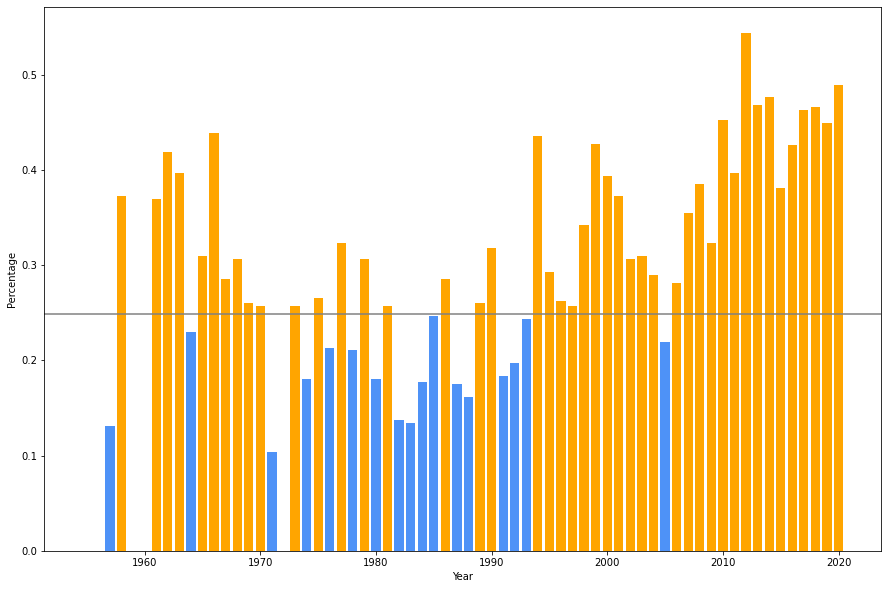

In [26]:
plt.figure(figsize=[15,10])
xax = grouped_by_year.index
yax = percents
colors = ['orange' if (x>baseline_percentage) else '#4E92F7' for x in yax]
plt.bar(xax, yax , color=colors)
plt.axhline(baseline_percentage, color='grey', lw=1.5)
plt.xlabel('Year')
plt.ylabel('Percentage')

#### **Comments**
The above diagram shows the extreme heat events of the period from 1955 to 2020.   
We notice that at the summer of 2012, the percentage of extreme events exceeded the 50%.  
The extreme heat percentages of most years are over the baseline period (1974-1999).

### Q5: Precipitation

* First of all, we copy the data at the DataFrame called `rain`, in order to edit them without altering the initial ones.
* We add a column called `YEAR` containing the year of each observation.
* The column `RAINED` is of type Boolean. It contains the value `True` when that day rain has been recorded (`PRCP` > 0.0) and `False` otherwise.
* We group the data by `YEAR`, calculating the summary of the columns and save the result at the new DataFrame called `grouped_rain`, which contains the total milimeters of rain (`PRCP`) and the number of the days that rained (`RAINED`) for each year.

In [27]:
rain = data_hellinikon.copy()
del rain['TAVG']
rain['YEAR'] = rain.DATE.dt.year
rain['RAINED'] = [(x>0.0) for x in rain.PRCP]
grouped_rain = rain.groupby(['YEAR']).sum()
grouped_rain

,PRCP,RAINED
YEAR,,
1955,547.370,67
1956,281.432,50
1957,302.514,66
1958,350.266,65
1959,213.868,57
...,...,...
2016,261.332,42
2017,304.396,48
2018,380.422,55


* At the column `BURSTS`, we save the percentage of precipitation per year by dividing the milimeters of rain with the number of rainy days.
* At the column `ROLLING_AVG`, we calculate the 10 year rolling average of `BURSTS` per year.

In [28]:
grouped_rain['BURSTS'] = grouped_rain.PRCP / grouped_rain.RAINED
grouped_rain['ROLLING_AVG'] = grouped_rain.BURSTS.rolling(10, min_periods=1).mean()

**Graph**
* We use matplotlib to design the graph.
* At the x axis we place the years and at the y axis the milimeters of precipitation.
* Lastly, we design the line of 10 year rolling average of the rain bursts of the period from 1955 to 2020.

<AxesSubplot:xlabel='YEAR', ylabel='Precipitation, mm'>

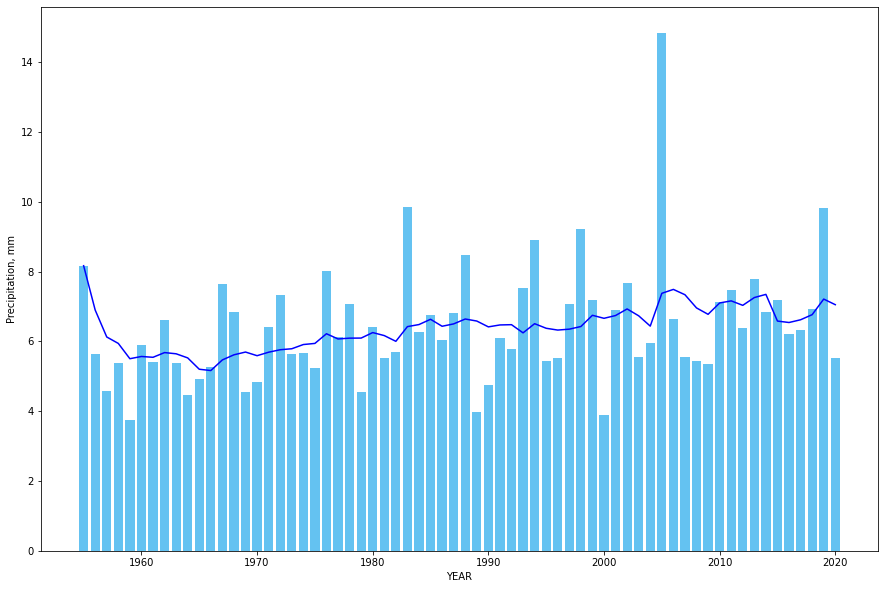

In [29]:
plt.figure(figsize=[15,10])
xaxis = grouped_rain.index
yaxis = grouped_rain.BURSTS
plt.bar(xaxis, yaxis , color='#64C2F1')
plt.ylabel('Precipitation, mm')
grouped_rain.ROLLING_AVG.plot(use_index=True, color='blue')

#### **Comments**
At the above diagram we notice that the milimetres of precipitation at the majority of the recorded bursts don't overcome the 10 year rolling average of 1955-2020.  
However, there are a few exceptions with the most intense being that of 2005.